*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur and updated by Ross Beveridge.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/fall22/notebooks/module02_04_svm.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# The Support Vector Machine:  a better linear classifier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['contour.negative_linestyle'] = 'solid'

## A Better Linear Classifier

What's wrong with the perceptron?  
Recall that the perceptron finds a seperating hyperplane if one exists, and provided no control over which one of the infinite number of separating hyperplanes gets chosen.  Also recall the date it was conceived - 1958.  Now fast forward to one of the most powerful ideas in the area of linear classifiers, the [Support Vector Machine](https://en.wikipedia.org/wiki/Support-vector_machine), aka SVM.

SVMs are based on the very compelling geometric idea of *large margin classification*.  This idea has deep mathematical underpinnings that explain why it works well in practice.
However, while for the perceptron we went over all the details, we will not be able to do so for SVMs in CS 345, and we leave those details for you to pursue later if you are interested.
For those interested, here's a link to a [tutorial paper](https://www.cs.colostate.edu/~asa/pdfs/howto.pdf) written by Asa a few years ago.


### The large margin approach

To demonstrate the idea of the margin, let's apply an SVM to a linearly separable dataset:

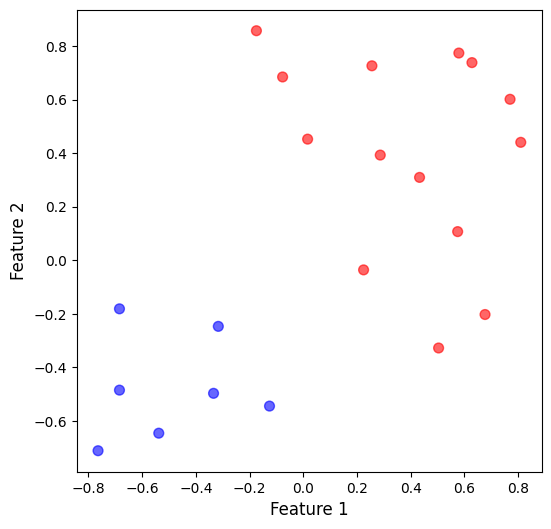

In [4]:
#X, y = make_blobs(n_samples=40, centers=2, random_state=6)
X=np.array([[-0.6845694511167466, -0.1812393869672504],
 [-0.6845694511167466, -0.484810815538679],
 [-0.5381984833748111, -0.6455251012529647],
 [-0.316424289826424, -0.24671557744344086],
 [-0.12569848337481115, -0.5443346250624885],
 [-0.33416622531029505, -0.49671557744344086],
 [-0.764408160794166, -0.7110012917291552],
 [0.6283337746897053, 0.7379783244360059],
 [0.5795434521090601, 0.7736926101502914],
 [0.2557531295284148, 0.726073562531244],
 [0.28680151662518893, 0.39274022919791074],
 [0.4331724843671245, 0.3094068958645775],
 [0.5751079682380924, 0.10702594348362493],
 [0.6771240972703501, -0.2024978660401846],
 [0.5041402263026082, -0.3274978660401846],
 [0.22470474243164062, -0.035831199373517864],
 [0.016237000496156728, 0.4522640387217203],
 [-0.07690816079416596, 0.6844068958645775],
 [-0.17448880595545635, 0.8570259434836249],
 [0.7702692585606727, 0.601073562531244],
 [0.8101886133993825, 0.4403592768169584]])
y=np.array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111)
colors = ['b' if y[i] == 0 else 'r' for i in range(len(y))]
ax.scatter(X[:, 0], X[:, 1], c=colors, s=50, alpha=0.6) 
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12);

Now let's create a linear SVM and train it.  We are using the scikit-learn [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) class.  There is a [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) class specifically designed for linear SVMs, but SVC has a feature we need for visualization purposes.


In [5]:
plot_str = ['or', '+b']
xmin = -1
xmax = 1
ymin = -1
ymax = 1

def decision_surface(classifier, X, y) :
    is_svm = True
    markersize=5
    fontsize = 'medium'
    contour_fontsize = 10
    # setting up the grid
    delta = 0.01
    xx = np.arange(xmin, xmax, delta)
    yy = np.arange(ymin, ymax, delta)

    YY, XX = np.meshgrid(yy, xx)
    xy = np.stack([XX.ravel(), YY.ravel()], axis=-1)
    # alternatively:
    #xy = np.column_stack([XX.ravel(), YY.ravel()])
    #print(xy.shape)

    Z = classifier.decision_function(xy).reshape(XX.shape)

    plt.figure(figsize=(5,5))
    im = plt.imshow(np.transpose(Z), 
                    interpolation='bilinear', origin='lower',
                    cmap=plt.cm.gray, extent=(xmin,xmax,ymin,ymax) )

    if (is_svm) :
        C = plt.contour(np.transpose(Z),
                        [-1,0,1],
                        origin='lower',
                        linewidths=(1,3,1),
                        colors = 'black',
                        extent=(xmin,xmax,ymin,ymax))
        plt.scatter(classifier.support_vectors_[:, 0],
                    classifier.support_vectors_[:, 1],
                    s=100, linewidth=1, facecolors="none",edgecolors="k")
    else :
        C = plt.contour(np.transpose(Z),
                        [0],
                        origin='lower',
                        linewidths=(3),
                        colors = 'black',
                        extent=(xmin,xmax,ymin,ymax))

    plt.clabel(C, inline=1, fmt='%1.1f',
               fontsize=contour_fontsize)
    # plot the data
    for i in range(len(X)) :
        plt.plot(X[i][0], X[i][1], plot_str[y[i]], markersize=markersize)


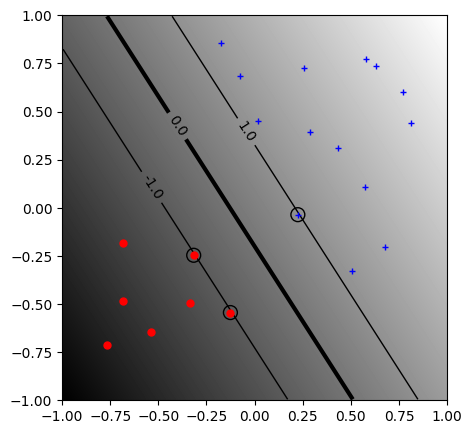

In [6]:
from sklearn import svm
# create an instance of a linear SVM 
classifier = svm.SVC(kernel="linear", C=1000)

# train the model:
classifier.fit(X, y)

# visualize:
decision_surface(classifier, X, y)

#### scikit-learn note

scikit-learn has two classes that implement SVMs:  [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html).
If all you want is a linear SVM, LinearSVC is the better choice as it uses faster training algorithms designed for linear SVMs.  The SVC class is used here for the added functionality it has for keeping track of the support vectors (note the use of `kernel='linear'` to make sure the SVM produces a linear decision boundary).

### The hard margin SVM:  Some technical details

Now that we have some intuition about how SVMs work, let's derive the optimization problem that is used to maximize the margin.  And we'll start with the linearly separable case, which will lead us to the *hard margin SVM*.

First, let's denote by $\mathbf{x}_{\oplus}$ / $\mathbf{x}_{\ominus}$ the  positive / negative example closest to the hyperplane.

Now we can compute the margin as:

$$
\frac{1}{2} \hat{\mathbf{w}}^{\top} (\mathbf{x}_{\oplus} - \mathbf{x}_{\ominus}).
$$

$\mathbf{x}_{\oplus}$ and $\mathbf{x}_{\ominus}$ are on the margin and we will agree that they satisfy:

$$
\begin{aligned}
f(\mathbf{x}_{\oplus}) & = \mathbf{w}^{\top} \mathbf{x}_{\oplus} + b  =  1 \\
f(\mathbf{x}_{\ominus}) & = \mathbf{w}^{\top} \mathbf{x}_{\ominus} + b =  - 1
\end{aligned}
$$

Now, if we subtract these two equations we get:

$$
\mathbf{w}^{\top} (\mathbf{x}_{\oplus} - \mathbf{x}_{\ominus}) = 2
$$

Finally, if we divide the two sides of the equation by $2 ||\mathbf{w}||$ we get:

$$
\frac{1}{2} \hat{\mathbf{w}}^{\top} (\mathbf{x}_{\oplus} - \mathbf{x}_{\ominus}) = \frac{1}{||\mathbf{w}||}.
$$

This tells us that the margin is equal to $\frac{1}{||\mathbf{w}||}$.  However, rather than maximizing it, we will equivalently minimize its inverse, which leads to the following optimization problem:

$$
\begin{aligned}
\underset{\mathbf{w}, b}{\mathrm{minimize~}}
 & \frac{1}{2} ||\mathbf{w}||^2  \\
\mathrm{subject~to:}~~  & y_i \left( \mathbf{w}^{\top} \mathbf{x}_i + b \right) \geq 1 ~~ i = 1,\ldots,N \,.
\end{aligned}
$$

The constraints merely express the fact that all training examples are correctly classified and are outside the margin.
Simple methods like gradient descent, which we will study later in the course, cannot be used for this constrained optimization problem.  Machine learning researchers have designed algorithms specifically for this kind of problem, and the details of those algorithms are beyond the scope of this course.

### When a hard margin SVM is not good enough

So far so good.  Let's look at another dataset where the hard margin SVM is not a good approach:

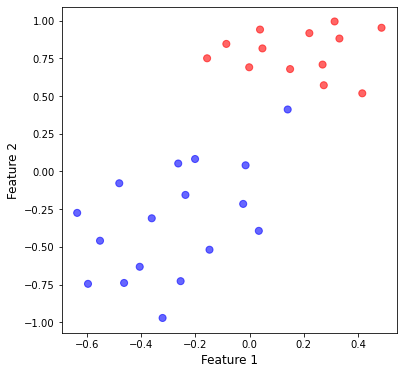

In [5]:
X=np.array([[-0.5515049349877144, -0.4593005952380954],
 [-0.1478759027296499, -0.5188244047619048],
 [-0.2543275156328757, -0.7271577380952382],
 [-0.4627952575683595, -0.7390625000000001],
 [-0.5958597736973917, -0.7450148809523811],
 [-0.3208597736973917, -0.9712053571428572],
 [-0.3607791285361015, -0.3104910714285716],
 [-0.2631984833748111, 0.05260416666666656],
 [-0.2011017091812628, 0.08236607142857122],
 [-0.023682354342553058, -0.21525297619047623],
 [-0.6357791285361014, -0.27477678571428577],
 [-0.4805371930522305, -0.07834821428571437],
 [-0.23658558014900466, -0.1557291666666667],
 [-0.40513396724577877, -0.631919642857143],
 [0.03397893598002755, -0.39382440476190483],
 [-0.014811386600617427, 0.0406994047619047],
 [0.14043054888325335, 0.4105973834083192],
 [0.2690595811413179, 0.7082164310273666],
 [0.14930151662518898, 0.678454526265462],
 [-0.1567468704715853, 0.7498830976940336],
 [-0.08577912853610137, 0.845121192932129],
 [0.04728538759293088, 0.8153592881702239],
 [0.2202692585606727, 0.9165497643607001],
 [0.3134144198509954, 0.9939307167416527],
 [0.4863982908187374, 0.9522640500749857],
 [0.4154305488832535, 0.5177402405511764],
 [0.2734950650122858, 0.571311669122605],
 [-0.0015049349877143126, 0.6903592881702239],
 [0.038414419850995474, 0.9403592881702239],
 [0.3311563553348664, 0.8808354786464145]])

y = np.zeros(len(X), np.int32); y[17:]=1
fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111)
colors = ['b' if y[i] == 0 else 'r' for i in range(len(y))]
ax.scatter(X[:, 0], X[:, 1], c=colors, s=50, alpha=0.6) 
ax.set_xlabel('Feature 1', fontsize=12)
ax.set_ylabel('Feature 2', fontsize=12);

Let's apply the hard margin SVM:

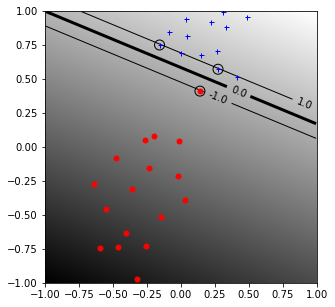

In [6]:
# create an instance of a linear SVM: 
classifier = svm.SVC(kernel="linear", C=1000)

# train the model:
classifier.fit(X, y)

# visualize:
decision_surface(classifier, X, y)

### The solution:  the soft margin SVM

There is a solution to this issue:  allow some points within the margin so we can be more flexible how we treat data points.  The 'C' parameter of the SVM (and hence the name "SVC") controls the penalty given to points within the margin.  Our initial SVM had a very high value of C to simulate a hard margin SVM.  Reducing this penalty will give us the flexibility we need in order to create a more appropriate decision boundary:

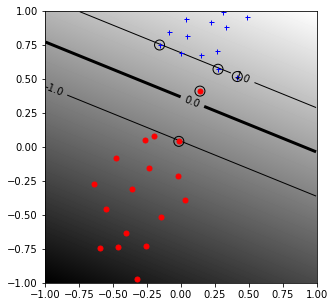

In [7]:
# create an instance of a linear SVM:
classifier = svm.SVC(kernel="linear", C=10)

# train the model:
classifier.fit(X, y)

# visualize:
decision_surface(classifier, X, y)

### Derivation of the soft margin SVM

The soft margin SVM allows the classifier to have points within the margin, or even misclassify them.  This is done by replacing our original hard margin constraints:

$$
y_i \left( \mathbf{w}^{\top} \mathbf{x}_i + b \right) \geq 1 ~~ i = 1,\ldots, N
$$

with soft constraints that allow some slack:

$$
y_i \left( \mathbf{w}^{\top} \mathbf{x}_i + b \right) \geq 1 - \xi_i ~~ i = 1,\ldots, N
$$

where $\xi_i\geq0$ are *slack variables* that allow data points to be within the margin or misclassified.
We do not want the classifier to use this slack too much, so we add a penalty to our original optimization problem that penalizes over-use of the slack variables:


$$
\begin{aligned}
\underset{\mathbf{w}, b}{\mathrm{minimize~}}
 & \frac{1}{2} ||\mathbf{w}||^2  + C \sum_{i=1}^N \xi_i  \\
\mathrm{subject~to:}~~  & y_i \left( \mathbf{w}^{\top} \mathbf{x}_i + b \right) \geq 1 - \xi_i ~~ i = 1,\ldots,N \,,\\
& \xi_i \geq 0 ~~ i = 1,\ldots,N \,.
\end{aligned}
$$

This introduced the soft-margin constant, $C$ which controls the amount of penalty placed on margin violations / misclassifications.


### SVM on real data

Let's compare the performance of the linear SVM with that of the perceptron on the breast cancer dataset:

In [8]:
from sklearn.datasets import load_breast_cancer
X,y = data = load_breast_cancer(return_X_y = True)
X.shape, y.shape

((569, 30), (569,))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2)

In [10]:
classifier = svm.SVC(kernel="linear", C=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('accuracy: ', np.mean(y_test == y_pred))

accuracy:  0.9473684210526315


Recall that in our experiment with the perceptron we got accuracy around 0.86.  A big improvement, and this is still with a linear model!

Let's see how the accuracy of the SVM varies with the soft-margin parameter, C:

In [11]:
C_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy = []
for C in C_list :
    classifier = svm.SVC(kernel="linear", C=C)
    classifier.fit(X_train, y_train)
    print('number of support vectors: ', len(classifier.support_))
    y_pred = classifier.predict(X_test)
    accuracy.append(np.mean(y_test == y_pred))

number of support vectors:  65
number of support vectors:  57
number of support vectors:  49
number of support vectors:  47
number of support vectors:  43
number of support vectors:  35
number of support vectors:  30
number of support vectors:  29


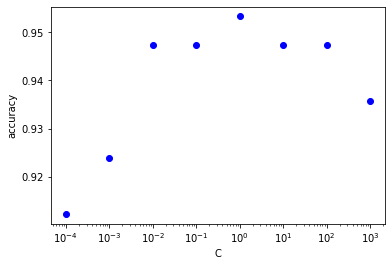

In [12]:
plt.semilogx(C_list, accuracy, 'ob')
plt.xlabel('C')
plt.ylabel('accuracy');

### Exercise

To convince yourself that the SVM is indeed that much better than the perceptron, run it on one of the datasets you analyzed in your assignments.

## Conclusions

The linear SVM is an extremely powerful tool, and it works remarkably well in most cases.  
Although a linear model may seem too simple, for many datasets,  especially when data dimensionality is high, a linear model is all you need.

There are extensions that generalize the idea to multi-class problems and also incorporate non-linearity, which is done using the idea of "kernels".

Our presentation of SVMs is based on the following tutorial paper:

* Asa Ben-Hur and Jason Weston. [A User’s guide to Support Vector Machines](https://www.cs.colostate.edu/~asa/pdfs/howto.pdf). In *Data Mining Techniques for the Life Sciences*. Oliviero Carugo and Frank Eisenhaber (eds.), 2009.

The original SVM paper:

* Boser, Bernhard E., Isabelle M. Guyon, and Vladimir N. Vapnik. A training algorithm for optimal margin classifiers.  In: *Proceedings of the fifth annual workshop on Computational learning theory*. 1992.

The soft margin SVM:

* Cortes, Corinna, and Vladimir Vapnik. Support-vector networks. *Machine learning* 20.3 (1995): 273-297.
